<a href="https://colab.research.google.com/github/Hubobv/Midterms_test/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

folder = '/content/drive/MyDrive/money/'

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('5000vnd'):
        output = 0
    elif file.startswith('10000vnd'):
        output = 1
    elif file.startswith('20k'):
        output = 2
    elif file.startswith('50k'):
        output = 3
    elif file.startswith('100k'):
        output = 4
    elif file.startswith('500k'):
        output = 5
    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

photos = np.array(photos)
labels = np.array(labels)


photos= photos.astype('float32')/255


labels = to_categorical(labels,14)


save('/content/drive/MyDrive/monan/money_photos.npy', photos)
save('/content/drive/MyDrive/monan/money_labels.npy', labels)


model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.8, nesterov= True)
model.compile(loss= categorical_crossentropy, optimizer= sgd, metrics = ['accuracy'])

train = model.fit(photos, labels, batch_size=64, epochs=60, verbose=1)

Epoch 1/60
1/1 [==============================] - 1s 705ms/step - loss: 2.6730 - accuracy: 0.0000e+00
Epoch 2/60
1/1 [==============================] - 0s 83ms/step - loss: 2.6164 - accuracy: 0.0000e+00
Epoch 3/60
1/1 [==============================] - 0s 78ms/step - loss: 2.4061 - accuracy: 0.2500
Epoch 4/60
1/1 [==============================] - 0s 66ms/step - loss: 2.3359 - accuracy: 0.3333
Epoch 5/60
1/1 [==============================] - 0s 65ms/step - loss: 2.2780 - accuracy: 0.0000e+00
Epoch 6/60
1/1 [==============================] - 0s 68ms/step - loss: 2.2377 - accuracy: 0.0000e+00
Epoch 7/60
1/1 [==============================] - 0s 67ms/step - loss: 1.9844 - accuracy: 0.2500
Epoch 8/60
1/1 [==============================] - 0s 64ms/step - loss: 1.9507 - accuracy: 0.1667
Epoch 9/60
1/1 [==============================] - 0s 66ms/step - loss: 1.9891 - accuracy: 0.1667
Epoch 10/60
1/1 [==============================] - 0s 65ms/step - loss: 1.8378 - accuracy: 0.2500
Epoch 11/60


In [ ]:
from keras.models import load_model
model.save('model2.h5')

In [ ]:
classes=['5000vnd','10000vnd','20k','50k','100k','500k']

1/1 [==============================] - 0s 382ms/step
[[0.1002503  0.00210713 0.17915887 0.00512594 0.0272618  0.00418144
  0.33097234 0.00518347 0.09430055 0.00695966 0.23117802 0.00707797
  0.00364713 0.0025954 ]]


'50k'

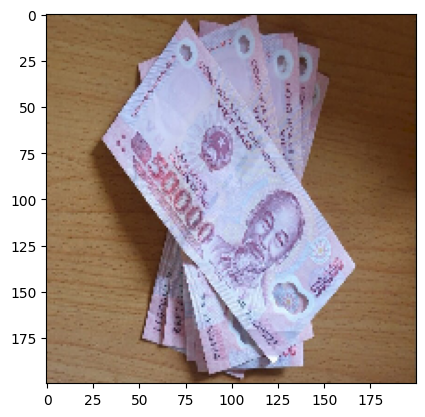

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model10=load_model('model2.h5')
img=load_img('/content/drive/MyDrive/50k.jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model10.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]